In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
file_names_sudoku = ['sudoku-orig.data', 'sudoku.data', 'sudoku-static.data',
                     'sudoku-dynamic.data', 'sudoku-guided.data', 'sudoku-auto.data']
run_times_sudoku = {}
for name in file_names_sudoku:
    with open(name) as f:
        run_times_sudoku[name] = [float(line) for line in f]

file_names_sudoku_4th = ['sudoku-4th-orig.data', 'sudoku-4th-.data', 'sudoku-4th-static.data',
                     'sudoku-dynamic.data', 'sudoku-guided.data', 'sudoku-4th-auto.data']
run_times_sudoku_4th = {}
for name in file_names_sudoku:
    with open(name) as f:
        run_times_sudoku_4th[name] = [float(line) for line in f]

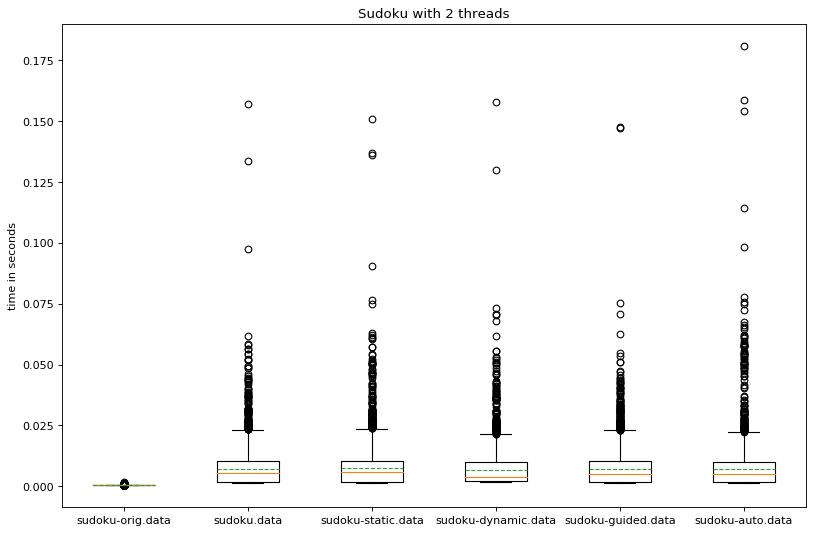

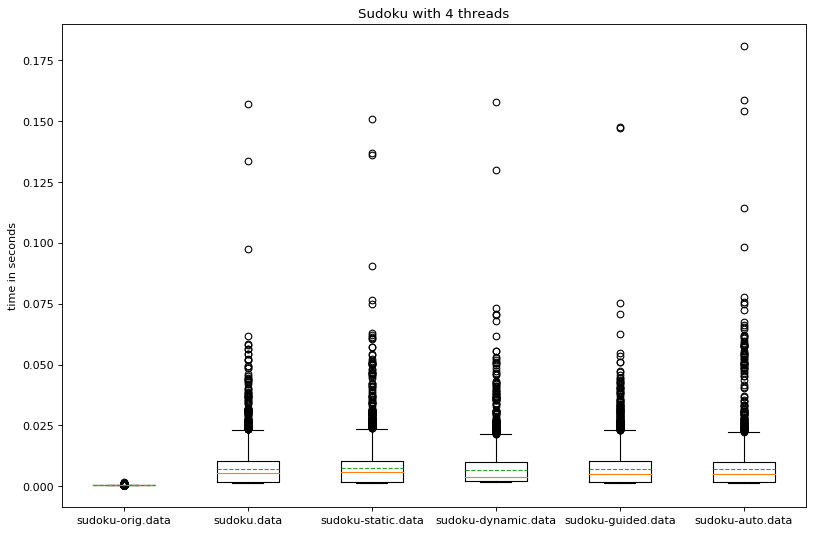

In [93]:
plt.figure(figsize=(12,8) , dpi=80)
plt.title('Sudoku with 2 threads')
plt.ylabel('time in seconds')
plt.boxplot(run_times_sudoku.values(), labels=run_times_sudoku.keys(), showmeans=True, meanline=True);
plt.savefig('sudoku-plot.png')
plt.figure(figsize=(12,8) , dpi=80)
plt.title('Sudoku with 4 threads')
plt.ylabel('time in seconds')
plt.boxplot(run_times_sudoku_4th.values(), labels=run_times_sudoku_4th.keys(), showmeans=True, meanline=True);
plt.savefig('sudoku-4th-plot.png')

In [82]:
partial_options = ['10-0.1', '10-0.01', '100-0.01', '1000-0.01', '10000-0.01']
run_times_partial = {}
for opt in partial_options:
    with open('partial-'+opt+'.data') as f, open('partial-orig-'+opt+'.data') as f_orig:
        run_times_partial[opt] = ([float(line) for line in f],[float(line) for line in f_orig])

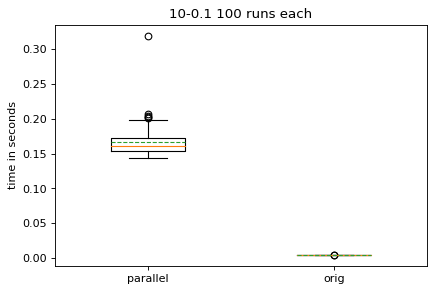

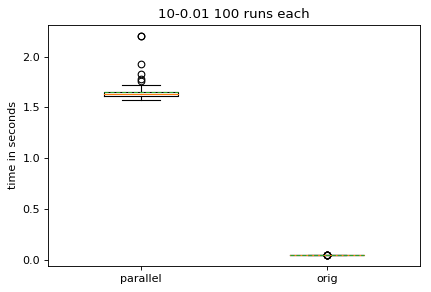

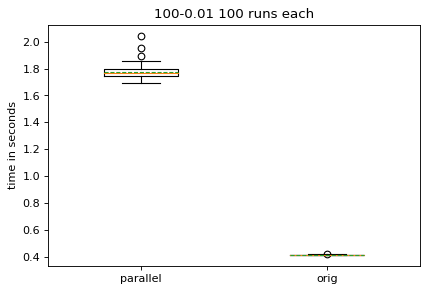

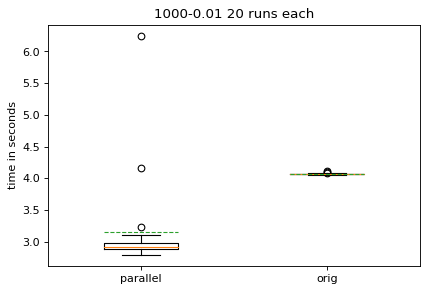

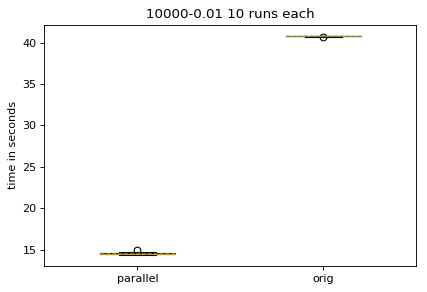

In [92]:
for opts, data in run_times_partial.items():
    plt.figure(figsize=(6,4), dpi=80)
    plt.title(f"{opts} {len(data[0])} runs each")
    plt.ylabel('time in seconds')
    plt.boxplot(data, labels=['parallel', 'orig'], widths=[0.4]*2, meanline=True, showmeans=True)
    plt.savefig(f"partial-{opts}-plot.png")

### Synchronization clauses

a) Please describe the difference between the “critical” and the “atomic” clause.

### Critical
The CRITICAL directive specifies a region of code that must be executed by only one thread at a time. 

#### Notes:

- If a thread is currently executing inside a CRITICAL region and another thread reaches that CRITICAL region and attempts to execute it, it will block until the first thread exits that CRITICAL region.

- The optional name enables multiple different CRITICAL regions to exist:
    - Names act as global identifiers. Different CRITICAL regions with the same name are treated as the same region.
    - All CRITICAL sections which are unnamed, are treated as the same section. 

#### Restrictions:

- It is illegal to branch into or out of a CRITICAL block.

### Atomic
ATOMIC directive specifies that a specific memory location must be updated atomically, rather than letting multiple threads attempt to write to it. In essence, this directive provides a mini-CRITICAL section.
There are multiple clauses supported by atomic: 
- read
- write
- update
- capture
(see specification for detailed explanation http://www.openmp.org/wp-content/uploads/openmp-4.5.pdf)

TLDR: Critical is for a block, atomic for a single statement/expression.

b) Please describe the “firstprivate” clause.  
The FIRSTPRIVATE clause combines the behavior of the PRIVATE clause with automatic initialization of the variables in its list. Listed variables are initialized according to the value of their original objects prior to entry into the parallel or work-sharing construct. 

(source: https://computing.llnl.gov/tutorials/openMP/)